# Creating Fig. 4.11 for Master thesis

In [2]:
%load_ext autoreload
%autoreload 2
import os.path as op
import tempfile

import matplotlib.pyplot as plt


import hnn_core
from hnn_core import simulate_dipole, jones_2009_model
from hnn_core.viz import plot_dipole


import sys
sys.path.append('../code/')
sys.path.append('../code/utils/')
#sys.path.append('../code/sbi/')
#sys.path.append('../../results_cluster/')


import numpy as np
import torch

# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt


import os


import utils.sbi_modulated_functions

# sbi
from sbi import utils as utils
from sbi import analysis as analysis
from sbi.inference.base import infer
from sbi.inference import SNPE, prepare_for_sbi, simulate_for_sbi

from sbi.analysis import conditional_pairplot, conditional_corrcoeff



# import the summary statistics that you want to investigate
from summary_features.calculate_summary_features import calculate_summary_statistics_alternative as alternative_sumstats
from summary_features.calculate_summary_features import calculate_summary_stats_temporal as temporal_sumstats
from summary_features.calculate_summary_features import calculate_summary_stats_number as number_sumstats
from summary_features.calculate_summary_features import calculate_summary_stats_temporal


In [3]:
print(torch.__version__)

1.9.1+cu102


In [4]:
## defining neuronal network model

num_params = 17

from utils.simulation_wrapper import set_network_default, SimulationWrapper
sim_wrapper = SimulationWrapper(num_params, noise=False)


In [6]:
window_len = 30


prior_min = [0, 0, 0, 0, 0, 13.3,  0, 0, 0, 0, 0, 51.980, 0, 0, 0, 0, 112.13]
prior_max = [0.927, 0.160, 2.093, 1.0, 1.0, 35.9, 0.000042, 0.039372, 0.025902,  0.480, 0.117, 75.08, 8.633, 4.104, 1.0, 1.0, 162.110]

true_params = torch.tensor([[0.277, 0.0399, 0.6244, 0.3739, 0.0, 18.977, 0.000012, 0.0115, 0.0134,  0.0767, 0.06337, 63.08, 4.6729, 2.33, 0.016733, 0.0679, 120.86]])


prior = utils.torchutils.BoxUniform(low=prior_min, high=prior_max)

#number_simulations = 10
density_estimator = 'nsf'


In [7]:

#assert (prior.event_shape==torch.Size([25]))
from utils import inference

In [8]:
from utils import inference

import pickle
from data_load_writer import *
from data_load_writer import load_from_file as lf


import os

print(os.getcwd())



/home/ubuntu/sbi_for_eeg_data/notebooks


In [9]:
file = '10000sims_17params_05_04_nsf_threshold'


print(os.getcwd())

os.chdir('/home/ubuntu/results')


print(os.getcwd())
  

posterior = torch.load('{}/posterior.pt'.format(file))

obs_real = torch.load('{}/obs_real.pt'.format(file))



/home/ubuntu/sbi_for_eeg_data/notebooks
/home/ubuntu/results


In [10]:
samples_t_100 = posterior.sample((100,))

Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

In [11]:
true_params_threshold = torch.tensor([0.08831, 0.01525, 0.19934, 0, 0, 26.61, 
                                     0.000007, 0.006562, 0.004317, 0.080074, 0.019482, 63.53,
                                     1.43884, 0.684013, 0, 0, 137.12])

In [12]:
file = '10000sims_17params_11_04_nsf_supra_ratio'




thetas = torch.load('{}/thetas.pt'.format(file))

posterior = torch.load('{}/posterior.pt'.format(file))


obs_real2 = torch.load('{}/obs_real.pt'.format(file))

In [13]:
samples_supra_100 = posterior.sample((100,))

Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

In [22]:
s_x_s = inference.run_only_sim(samples_supra_100, simulation_wrapper=sim_wrapper, num_workers=8)

param size 17param size
param size  17param size17
early stopearly stopparam size 200.0param size
  early stop   param size17
param size200.017200.0

 17
param size param size 17
 param size early stop17early stop 
   early stop
17200.0 17


 early stop200.0200.0 


param size 200.0 
17
param size param size  1717
early stop 200.0 param size  
17
17

param size  17
num_paramsnum_params  1717

num_params 17joblib will run over 1 jobs
joblib will run over 1 jobs
num_paramsnum_params 
 1717num_params

 joblib will run over 1 jobsjoblib will run over 1 jobsjoblib will run over 1 jobs


17
num_paramsnum_params  17
17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Using backend MultiprocessingBackend with 8 concurrent workers.
joblib will run over 1 jobs
joblib will run over 1 jobs
Loading custom mechanism files from /home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/hnn_core/mod/x86_64/.libs/libnrnmech.soLoading custom mechanism files from /home/ubuntu/miniconda3/envs/sbi_e

 24.37656592]
param size 17
early stop 200.0
param size  17
obs [-0.59760178 -0.59840714 -0.59920666 ... 22.74564682 22.66781874
 22.59004341]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
num_params [Parallel(n_jobs=8)]: Done   6 tasks      | elapsed:  1.6min
[Parallel(n_jobs=8)]: Done   7 tasks      | elapsed:  1.6min
17
joblib will run over 1 jobs
Building the NEURON model
Simulation time: 190.0 ms...
Building the NEURON model
Building the NEURON model
Building the NEURON model
Building the NEURON model
obs [-0.59760178 -0.59840714 -0.59920666 ... 26.91729654 26.83973274
 26.76220982]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done   8 tasks      | elapsed:  1.7min
Building the NEURON model
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
[D

running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 30.0 ms...
Simulation time: 10.0 ms...
Simulation time: 10.0 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 10.0 ms...
Simulation time: 40.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 20.0 ms...
Simulation time: 50.0 ms...
Simulation time: 30.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 30.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 30.0 ms...
Simulation time: 60.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 40.0 ms...
Simulation time: 40.0 ms...
Simulation time: 40.0 ms...
Simulation time

Simulation time: 50.0 ms...
Simulation time: 70.0 ms...
Simulation time: 60.0 ms...
Simulation time: 60.0 ms...
Simulation time: 60.0 ms...
Simulation time: 100.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 60.0 ms...
Simulation time: 80.0 ms...
Simulation time: 70.0 ms...
Simulation time: 70.0 ms...
Simulation time: 70.0 ms...
Simulation time: 110.0 ms...
Simulation time: 70.0 ms...
Simulation time: 80.0 ms...
Simulation time: 70.0 ms...
Simulation time: 90.0 ms...
Simulation time: 80.0 ms...
Simulation time: 80.0 ms...
Simulation time: 80.0 ms...
Simulation time: 120.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 80.0 ms...
Simulation time: 100.0 ms...
Simulation time: 90.0 ms...
Simulation time: 90.0 ms...
Simulation time: 90.0 ms...
Simulation time: 130.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 90.0 ms...
Simulation time: 110.0 ms...
Simulation time: 100.0 ms...
Simulation t

Simulation time: 110.0 ms...
Simulation time: 100.0 ms...
Simulation time: 130.0 ms...
Simulation time: 110.0 ms...
Simulation time: 160.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Simulation time: 120.0 ms...
Simulation time: 120.0 ms...
Simulation time: 140.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 170.0 ms...
Simulation time: 130.0 ms...
Simulation time: 140.0 ms...
Simulation time: 130.0 ms...
Simulation time: 130.0 ms...
Simulation time: 150.0 ms...
Simulation time: 180.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Simulation time: 140.0 ms...
Simulation time: 150.0 ms...
Simulation time: 140.0 ms...
Simulation time: 140.0 ms...
Simulation time: 160.0 ms...
Simulation time: 190.0 ms...
Simulation time: 130.0 ms...
Simulation time: 140.0 ms...
Simulation time: 150.0 ms...
Simulation time: 160.0 ms...
Simulation time: 150.0 ms...
Simulation time: 150.0 ms...
Simulation time: 170.0 ms...
obs [-0.597601

Simulation time: 140.0 ms...
Simulation time: 150.0 ms...
Simulation time: 160.0 ms...
Simulation time: 160.0 ms...
[Done]
running trial 1 on 1 coresSimulation time: 170.0 ms...

Simulation time: 0.03 ms...
Simulation time: 190.0 ms...
Simulation time: 160.0 ms...
Simulation time: 150.0 ms...
Simulation time: 160.0 ms...
Simulation time: 170.0 ms...
Simulation time: 170.0 ms...
Simulation time: 180.0 ms...
Simulation time: 10.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 25.54837567 25.46677744
 25.38518399]
param size 17
early stop 200.0
param size  17
Simulation time: 170.0 ms...
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  42 tasks      | elapsed:  9.8min
Building the NEURON model
Simulation time: 170.0 ms...
Simulation time: 160.0 ms...
Simulation time: 180.0 ms...
Simulation time: 180.0 ms...
Simulation time: 190.0 ms...
Simulation time: 180.0 ms...
Simulation time: 20.0 ms...
Simulation time: 180.0 ms...
Simulation time: 170.0 ms...
Simulation time

Simulation time: 10.0 ms...
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  51 tasks      | elapsed: 11.6min
Simulation time: 40.0 ms...
Building the NEURON model
Simulation time: 190.0 ms...
Simulation time: 180.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 26.78114338 26.69829181
 26.61545341]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  52 tasks      | elapsed: 11.7min
obs [-0.59760178 -0.59840714 -0.59920666 ... 27.51270244 27.42546555
 27.33827034]
param size 17
early stop 200.0
param size  17
[Parallel(n_jobs=8)]: Done  53 tasks      | elapsed: 11.7min
num_params 17
joblib will run over 1 jobs
obs [-0.59760178 -0.59840714 -0.59920666 ... 27.53496335 27.44911284
 27.36327069]
param size 17
early stop 200.0
param size  17
Building the NEURON model
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  54 tasks      | elapsed: 11.7min
Simulation time: 20.0 ms...
Simulat

Simulation time: 180.0 ms...
Simulation time: 70.0 ms...
Building the NEURON model
Simulation time: 20.0 ms...
Simulation time: 80.0 ms...
Simulation time: 190.0 ms...
Simulation time: 30.0 ms...
Simulation time: 90.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 29.5473541  29.44641486
 29.34551934]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
[Done]
running trial 1 on 1 cores
[Parallel(n_jobs=8)]: Done  64 tasks      | elapsed: 13.5min
[Done]
Simulation time: 0.03 ms...running trial 1 on 1 cores

Simulation time: 0.03 ms...
Building the NEURON model
[Done]
running trial 1 on 1 cores
Simulation time: 40.0 ms...
Simulation time: 0.03 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 100.0 ms...
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
Simulation time: 10.0 ms...
Simulation time: 10.0 ms...
Simulation time: 50.0 ms...
Simulation time: 10.0 ms...
Simulation 

Simulation time: 140.0 ms...
Simulation time: 30.0 ms...
Simulation time: 30.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 20.0 ms...
Simulation time: 10.0 ms...
Simulation time: 70.0 ms...
Simulation time: 150.0 ms...
Simulation time: 40.0 ms...
Simulation time: 40.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 30.0 ms...
Simulation time: 20.0 ms...
Simulation time: 80.0 ms...
Simulation time: 160.0 ms...
Simulation time: 50.0 ms...
Simulation time: 50.0 ms...
Simulation time: 50.0 ms...
Simulation time: 40.0 ms...
Simulation time: 40.0 ms...
Simulation time: 30.0 ms...
Simulation time: 90.0 ms...
Simulation time: 60.0 ms...
Simulation time: 170.0 ms...
Simulation time: 60.0 ms...
Simulation time: 60.0 ms...
Simulation time: 50.0 ms...
Simulation time: 50.0 ms...
Simulation time: 40.0 ms...
Simulation time: 100.0 ms...
Simulation time: 70.0 ms...
Simulation time: 180.0 ms...
Simulation time: 70.0 ms...
Simulation tim

obs [-0.59760178 -0.59840714 -0.59920666 ... 28.28676806 28.19674711
 28.10665858]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  81 tasks      | elapsed: 17.7min
Simulation time: 90.0 ms...
Simulation time: 60.0 ms...
Building the NEURON model
Simulation time: 70.0 ms...
Simulation time: 120.0 ms...
Simulation time: 90.0 ms...
Simulation time: 90.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 70.0 ms...
Simulation time: 80.0 ms...
Simulation time: 130.0 ms...
Simulation time: 100.0 ms...
Simulation time: 100.0 ms...
Simulation time: 100.0 ms...
Simulation time: 110.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 80.0 ms...
Simulation time: 0.03 ms...
Simulation time: 90.0 ms...
Simulation time: 140.0 ms...
Simulation time: 110.0 ms...
Simulation time: 110.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 90.0 ms...
Simulation time: 10.0 ms

Simulation time: 120.0 ms...
Simulation time: 100.0 ms...
Simulation time: 140.0 ms...
Simulation time: 140.0 ms...
Simulation time: 160.0 ms...
Simulation time: 140.0 ms...
Simulation time: 20.0 ms...
Simulation time: 140.0 ms...
Simulation time: 130.0 ms...
Simulation time: 110.0 ms...
Simulation time: 150.0 ms...
Simulation time: 150.0 ms...
Simulation time: 150.0 ms...
Simulation time: 170.0 ms...
Simulation time: 150.0 ms...
Simulation time: 30.0 ms...
Simulation time: 140.0 ms...
Simulation time: 160.0 ms...
Simulation time: 160.0 ms...
Simulation time: 120.0 ms...
Simulation time: 160.0 ms...
Simulation time: 160.0 ms...
Simulation time: 180.0 ms...
Simulation time: 40.0 ms...
Simulation time: 170.0 ms...
Simulation time: 170.0 ms...
Simulation time: 150.0 ms...
Simulation time: 170.0 ms...
Simulation time: 130.0 ms...
Simulation time: 170.0 ms...
Simulation time: 190.0 ms...
Simulation time: 50.0 ms...
Simulation time: 180.0 ms...
Simulation time: 180.0 ms...
Simulation time: 1

In [14]:
s_x_t = inference.run_only_sim(samples_t_100, simulation_wrapper=sim_wrapper, num_workers=8)
#s_x_s = inference.run_only_sim(samples_supra_100, simulation_wrapper=sim_wrapper, num_workers=8)

param size param size17param size
early stop   param size17200.0

param size17 param size 17 17

early stop 
 early stop200.0early stop 
 param size 200.0
param size param size  17
early stopparam size  17200.0 param size200.017


 17early stop
param size   17200.0
param size early stop
1717
 17


 200.0early stop 200.0

param size param size  17
 param size  1717
num_params
 num_paramsnum_params 17 
num_params17 
17joblib will run over 1 jobs17

joblib will run over 1 jobs

joblib will run over 1 jobsjoblib will run over 1 jobs
num_params 17num_params

 joblib will run over 1 jobs17

num_params[Parallel(n_jobs=8)]: Using backend MultiprocessingBackend with 8 concurrent workers.
 17
joblib will run over 1 jobsjoblib will run over 1 jobs

num_params 17
joblib will run over 1 jobs
Loading custom mechanism files from /home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/hnn_core/mod/x86_64/.libs/libnrnmech.so
Loading custom mechanism files from /home/ubuntu/miniconda3/envs/sbi_

obs [-0.59760178 -0.59840714 -0.59920666 ... 28.41695968 28.31979656
 28.22272585]
param size 17
early stop 200.0
param size  17
num_params 17[Parallel(n_jobs=8)]: Done   6 tasks      | elapsed:  1.6min

joblib will run over 1 jobs
Building the NEURON model
obs [-0.59760178 -0.59840714 -0.59920666 ... 29.67699254 29.58431378
 29.49166964]
param size 17
early stop 200.0
param size  17
Building the NEURON model
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done   7 tasks      | elapsed:  1.6min
Building the NEURON model
Building the NEURON model
obs [-0.59760178 -0.59840714 -0.59920666 ... 36.18730835 36.0660548
 35.94479937]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done   8 tasks      | elapsed:  1.6min
Building the NEURON model
[Done]
running trial 1 on 1 cores
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 0.03 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 

Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 10.0 ms...
Simulation time: 30.0 ms...
Simulation time: 10.0 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 30.0 ms...
Simulation time: 0.03 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 20.0 ms...
Simulation time: 40.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 40.0 ms...
Simulation time: 30.0 ms...
Simulation time: 10.0 ms...
Simulation time: 10.0 ms...
Simulation time: 30.0 ms...
Simulation time: 50.0 ms...
Simulation time: 30.0 ms...
Simulation time: 30.0 ms...
Simulation time: 50.0 ms...
Simulation time: 40.0 ms...
Simulation time: 20.0 ms...
Simulation time: 40.0 ms...
Simulation time: 20.0 ms...
Simulation time: 60.0 ms...
Simulation time: 40.0 ms...
Simulation time: 40.0 ms...
Simulation time: 60.0 ms...
Simulation time: 50.0 ms...
Simulation time: 30.0 ms...
Simulati

Simulation time: 60.0 ms...
Simulation time: 40.0 ms...
Simulation time: 90.0 ms...
Simulation time: 70.0 ms...
Simulation time: 80.0 ms...
Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 70.0 ms...
Simulation time: 50.0 ms...
Simulation time: 100.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 70.0 ms...
Simulation time: 60.0 ms...
Simulation time: 80.0 ms...
Simulation time: 80.0 ms...
Simulation time: 60.0 ms...
Simulation time: 90.0 ms...
Simulation time: 110.0 ms...
Simulation time: 80.0 ms...
Simulation time: 100.0 ms...
Simulation time: 70.0 ms...
Simulation time: 90.0 ms...
Simulation time: 90.0 ms...
Simulation time: 70.0 ms...
Simulation time: 100.0 ms...
Simulation time: 120.0 ms...
Simulation time: 90.0 ms...
Simulation time: 80.0 ms...
Simulation time: 110.0 ms...
Simulation time: 100.0 ms...
Simulation time: 100.0 ms...
Simulation time: 110.0 ms...
Simulation time: 80.0 ms...
Simulation 

Simulation time: 100.0 ms...
Simulation time: 90.0 ms...
Simulation time: 130.0 ms...
Simulation time: 160.0 ms...
Simulation time: 130.0 ms...
Simulation time: 120.0 ms...
Simulation time: 120.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 100.0 ms...
Simulation time: 140.0 ms...
Simulation time: 170.0 ms...
Simulation time: 140.0 ms...
Simulation time: 130.0 ms...
Simulation time: 130.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Simulation time: 150.0 ms...
Simulation time: 110.0 ms...
Simulation time: 150.0 ms...
Simulation time: 180.0 ms...
Simulation time: 140.0 ms...
Simulation time: 140.0 ms...
Simulation time: 130.0 ms...
Simulation time: 140.0 ms...
Simulation time: 160.0 ms...
Simulation time: 120.0 ms...
Simulation time: 160.0 ms...
Simulation time: 190.0 ms...
Simulation time: 150.0 ms...
Simulation time: 140.0 ms...
Simulation time: 150.0 ms...
Simulation time: 170.0 ms...
Simulation time: 150.0 ms...
Simulation time

 35.30118485]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  41 tasks      | elapsed: 10.1min
Building the NEURON model
obs [-0.59760178 -0.59840714 -0.59920666 ... 34.38411086 34.27494372
 34.1657546 ]Simulation time: 180.0 ms...

param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  42 tasks      | elapsed: 10.1min
Simulation time: 150.0 ms...
Simulation time: 160.0 ms...
Simulation time: 170.0 ms...
Simulation time: 160.0 ms...
Building the NEURON model
Simulation time: 180.0 ms...
Simulation time: 190.0 ms...
Simulation time: 160.0 ms...
Simulation time: 170.0 ms...
Simulation time: 170.0 ms...
Simulation time: 180.0 ms...
Simulation time: 190.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 29.11063161 29.00810553
 28.90560305]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  43 tas

running trial 1 on 1 coresBuilding the NEURON model

Simulation time: 0.03 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 170.0 ms...
Simulation time: 190.0 ms...
Simulation time: 170.0 ms...
Simulation time: 190.0 ms...
Simulation time: 10.0 ms...
Simulation time: 10.0 ms...
Simulation time: 180.0 ms...
Simulation time: 180.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 36.68171965 36.56711811
 36.45240115]
param size 17
early stop 200.0
param size  17
[Parallel(n_jobs=8)]: Done  53 tasks      | elapsed: 13.1min
num_params 17
joblib will run over 1 jobs
obs [-0.59760178 -0.59840714 -0.59920666 ... 35.95408752 35.83128187
 35.70851583]
param size 17
early stop 200.0
param size  17
[Parallel(n_jobs=8)]: Done  54 tasks      | elapsed: 13.1min
num_params 17
joblib will run over 1 jobs
Building the NEURON model
Simulation time: 20.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
[Done]
running trial 1 on 1 cores
Simulation ti

running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 180.0 ms...
Building the NEURON model
Building the NEURON model
Simulation time: 40.0 ms...
Simulation time: 40.0 ms...
Simulation time: 190.0 ms...
Simulation time: 10.0 ms...
Simulation time: 50.0 ms...
Simulation time: 10.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 20.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 30.01902648 29.9155367
 29.81212348]
param size 17
early stop 200.0
param size  17
[Parallel(n_jobs=8)]: Done  64 tasks      | elapsed: 16.7min
num_params Simulation time: 50.0 ms...17

joblib will run over 1 jobs
Simulation time: 60.0 ms...
Simulation time: 20.0 ms...
Building the NEURON model
Simulation time: 10.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 60.0 ms...
Simulation time: 30.0 ms...
Simulation time: 70.0 ms...
Simulation time: 30.0 ms...


Simulation time: 30.0 ms...
Simulation time: 90.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 20.0 ms...
Simulation time: 50.0 ms...
Simulation time: 50.0 ms...
Simulation time: 40.0 ms...
Simulation time: 100.0 ms...
Simulation time: 40.0 ms...
Simulation time: 90.0 ms...
Simulation time: 10.0 ms...
Simulation time: 30.0 ms...Simulation time: 60.0 ms...

Simulation time: 60.0 ms...
Simulation time: 50.0 ms...
Simulation time: 50.0 ms...
Simulation time: 110.0 ms...
Simulation time: 100.0 ms...
Simulation time: 20.0 ms...
Simulation time: 70.0 ms...
Simulation time: 70.0 ms...
Simulation time: 40.0 ms...
Simulation time: 60.0 ms...
Simulation time: 60.0 ms...
Simulation time: 30.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 80.0 ms...
Simulation time: 80.0 ms...
Simulation time: 50.0 ms...
Simulation time: 70.0 ms...
Simulation time: 40.0 ms...
Simulation time: 70.0 ms...
Simulation time: 120.0 ms...
Simulati

Simulation time: 100.0 ms...
Simulation time: 60.0 ms...Simulation time: 60.0 ms...

Simulation time: 140.0 ms...
Simulation time: 160.0 ms...
Simulation time: 100.0 ms...
Simulation time: 90.0 ms...
Simulation time: 70.0 ms...
Simulation time: 110.0 ms...
Simulation time: 100.0 ms...
Simulation time: 70.0 ms...
Simulation time: 150.0 ms...
Simulation time: 110.0 ms...
Simulation time: 170.0 ms...
Simulation time: 100.0 ms...
Simulation time: 80.0 ms...
Simulation time: 120.0 ms...
Simulation time: 160.0 ms...Simulation time: 120.0 ms...

Simulation time: 80.0 ms...
Simulation time: 110.0 ms...
Simulation time: 110.0 ms...Simulation time: 180.0 ms...

Simulation time: 90.0 ms...
Simulation time: 130.0 ms...
Simulation time: 130.0 ms...
Simulation time: 120.0 ms...
Simulation time: 170.0 ms...
Simulation time: 90.0 ms...Simulation time: 120.0 ms...

Simulation time: 190.0 ms...
Simulation time: 100.0 ms...
Simulation time: 140.0 ms...
Simulation time: 140.0 ms...
Simulation time: 180.0 

Simulation time: 140.0 ms...
Simulation time: 140.0 ms...
Simulation time: 140.0 ms...
Simulation time: 190.0 ms...
Simulation time: 150.0 ms...
Simulation time: 100.0 ms...
Simulation time: 110.0 ms...
Simulation time: 150.0 ms...
Simulation time: 150.0 ms...
Simulation time: 150.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 34.47258794 34.3611414
 34.24969278]
param size 17
early stop 200.0
Simulation time: 160.0 ms...
param size  17
num_params 17
joblib will run over 1 jobs
Building the NEURON model
Simulation time: 160.0 ms...
Simulation time: 120.0 ms...Simulation time: 110.0 ms...

Simulation time: 160.0 ms...
Simulation time: 160.0 ms...
Simulation time: 10.0 ms...
Simulation time: 170.0 ms...
Simulation time: 170.0 ms...
Simulation time: 130.0 ms...
Simulation time: 120.0 ms...
Simulation time: 20.0 ms...
Simulation time: 170.0 ms...
Simulation time: 170.0 ms...
Simulation time: 180.0 ms...
Simulation time: 18

In [15]:
### sample from prior now
num_samples = 100
samples_prior = []


for i in range(num_samples):
    sample = prior.sample()
    samples_prior.append(sample)
    

In [16]:
    
s_x_prior = inference.run_only_sim(samples_prior, sim_wrapper, num_workers=8)

param sizeparam sizeparam sizeparam size   param size 17171717

param size

early stopearly stopearly stopearly stop     200.017200.0200.0 200.0



param size 
param size param size  17param size    171717
early stop

17 
200.0
param sizeparam size
early stop   17200.0param size 
param size  
 17
17early stop17 

200.0
param size  early stop17 200.0

param size  17
[Parallel(n_jobs=8)]: Using backend MultiprocessingBackend with 8 concurrent workers.
num_paramsnum_params 17 17
num_params
num_params joblib will run over 1 jobs num_paramsjoblib will run over 1 jobs
17num_params
17  

num_params1717num_paramsjoblib will run over 1 jobs 


17 
joblib will run over 1 jobs17joblib will run over 1 jobs


joblib will run over 1 jobsjoblib will run over 1 jobs
joblib will run over 1 jobs

Loading custom mechanism files from /home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/hnn_core/mod/x86_64/.libs/libnrnmech.so
Building the NEURON model
Loading custom mechanism files from /home/u

joblib will run over 1 jobs
obs [-0.59760178 -0.59840714 -0.59920666 ... 36.81506089 36.70124182
 36.58742188]
param size 17
early stop 200.0
param size  17
Building the NEURON model
[Parallel(n_jobs=8)]: Done   6 tasks      | elapsed:  3.2min
num_params 17
joblib will run over 1 jobs
Building the NEURON model
obs [ 0.09053339  0.09813871  0.10574113 ... 63.51766956 63.29222326
 63.06702193]
param size 17
early stop 200.0
param size  17
[Parallel(n_jobs=8)]: Done   7 tasks      | elapsed:  3.2min
num_paramsobs [-0.59659938 -0.59726554 -0.59790596 ... 38.81187455 38.68926706
 38.56657639]
 17param size
 17
early stop joblib will run over 1 jobs200.0

param size  17
[Parallel(n_jobs=8)]: Done   8 tasks      | elapsed:  3.2min
num_params 17
joblib will run over 1 jobs
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Building the NEURON model
Building the NEURON model
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
[Done]
running trial 1 on 1 cores
Simulation tim

Simulation time: 0.03 ms...
Simulation time: 20.0 ms...
Simulation time: 10.0 ms...
Simulation time: 30.0 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
Simulation time: 30.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 40.0 ms...
Simulation time: 30.0 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...Simulation time: 10.0 ms...

Simulation time: 40.0 ms...
Simulation time: 30.0 ms...
Simulation time: 50.0 ms...
Simulation time: 30.0 ms...
Simulation time: 20.0 ms...
Simulation time: 40.0 ms...
Simulation time: 30.0 ms...
Simulation time: 20.0 ms...
Simulation time: 50.0 ms...
Simulation time: 40.0 ms...
Simulation time: 40.0 ms...
Simulation time: 60.0 ms...
Simulation time: 40.0 ms...
Simulation time: 30.0 ms...
Simulation time: 30.0 ms...
Simulation time: 50.0 ms...
Simulati

Simulation time: 80.0 ms...Simulation time: 60.0 ms...

Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 60.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 60.0 ms...
Simulation time: 90.0 ms...
Simulation time: 70.0 ms...
Simulation time: 70.0 ms...
Simulation time: 80.0 ms...
Simulation time: 70.0 ms...
Simulation time: 70.0 ms...
Simulation time: 80.0 ms...
Simulation time: 70.0 ms...
Simulation time: 100.0 ms...
Simulation time: 80.0 ms...
Simulation time: 80.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 90.0 ms...
Simulation time: 80.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 110.0 ms...
Simulation time: 90.0 ms...
Simulation time: 90.0 ms...Simulation time: 90.0 ms...

Simulation time: 100.0 ms...
Simulation time: 100.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 100.0 ms...
Simulation tim

Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 100.0 ms...
Simulation time: 140.0 ms...
Simulation time: 130.0 ms...
Simulation time: 130.0 ms...Simulation time: 120.0 ms...

Simulation time: 120.0 ms...
Simulation time: 110.0 ms...
Simulation time: 150.0 ms...
Simulation time: 130.0 ms...
Simulation time: 130.0 ms...
Simulation time: 110.0 ms...
Simulation time: 140.0 ms...
Simulation time: 130.0 ms...
Simulation time: 140.0 ms...
Simulation time: 120.0 ms...
Simulation time: 160.0 ms...
Simulation time: 140.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Simulation time: 140.0 ms...
Simulation time: 140.0 ms...
Simulation time: 150.0 ms...
Simulation time: 150.0 ms...
Simulation time: 150.0 ms...
Simulation time: 170.0 ms...
Simulation time: 130.0 ms...
Simulation time: 140.0 ms...
Simulation time: 160.0 ms...
Simulation time: 160.0 ms...Simulation time: 150.0 ms...

Simulation time: 150.0 ms...
Simulation time: 160.0 ms...
Simulation tim

Simulation time: 140.0 ms...
Building the NEURON model
Simulation time: 140.0 ms...
Simulation time: 170.0 ms...
Simulation time: 170.0 ms...
Simulation time: 160.0 ms...
Simulation time: 150.0 ms...
Simulation time: 190.0 ms...
Simulation time: 150.0 ms...
Simulation time: 150.0 ms...
Simulation time: 180.0 ms...
Simulation time: 180.0 ms...
Simulation time: 170.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 68.22656651 68.02947707
 67.83235645]
param size 17
early stop 200.0
param size  17
num_params[Parallel(n_jobs=8)]: Done  42 tasks      | elapsed: 18.7min
 17
joblib will run over 1 jobs
Simulation time: 160.0 ms...
Building the NEURON model
Simulation time: 190.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 160.0 ms...
Simulation time: 160.0 ms...
Simulation time: 190.0 ms...
Simulation time: 170.0 ms...
Simulation time: 180.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 26.43882519 26.35130423
 26.26381809]
param size 17
early 

param size Simulation time: 160.0 ms... 17

[Parallel(n_jobs=8)]: Done  52 tasks      | elapsed: 22.3min
num_params 17
joblib will run over 1 jobs
Building the NEURON model
Building the NEURON model
Simulation time: 190.0 ms...
Simulation time: 10.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 190.0 ms...
Simulation time: 180.0 ms...
Simulation time: 0.03 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 20.46337376 20.40717034
 20.35099467]
param size 17
early stop 200.0
param size  17
[Parallel(n_jobs=8)]: Done  53 tasks      | elapsed: 22.5min
num_params 17
joblib will run over 1 jobs
Simulation time: 170.0 ms...
Building the NEURON model
Simulation time: 20.0 ms...
Simulation time: 10.0 ms...
Simulation time: 190.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 30.6053161  30.50226651
 30.3992769 ]
param size [Done]17
early stop
 running trial 1 on 1 cores
200.0
param size  17
[Parallel(n_jobs=8)]: Done  54 tasks      | elapsed: 22.6min
Simulation time: 0.03 ms...n

Simulation time: 0.03 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 32.93537689 32.83092734
 32.72648079]
param size 17
early stop 200.0
param size  17
[Parallel(n_jobs=8)]: Done  63 tasks      | elapsed: 26.2min
num_params 17
joblib will run over 1 jobs
[Done]
running trial 1 on 1 coresSimulation time: 30.0 ms...

Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
Simulation time: 190.0 ms...Building the NEURON model

[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulation time: 10.0 ms...
Simulation time: 40.0 ms...
Simulation time: 20.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 54.56443062 54.37776064
 54.1911879 ]
param size 17
early stop 200.0
param size  17
[Parallel(n_jobs=8)]: Done  64 tasks      | elapsed: 26.4min
num_params 17
joblib will run over 1 jobs
Simulation time: 10.0 ms...
Building the NEURON model
Simulation time: 60.0 m

Simulation time: 80.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 60.0 ms...
[Done]
running trial 1 on 1 coresSimulation time: 20.0 ms...

Simulation time: 0.03 ms...
Simulation time: 30.0 ms...
Simulation time: 90.0 ms...
Simulation time: 80.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 40.0 ms...
Simulation time: 70.0 ms...
Simulation time: 10.0 ms...
Simulation time: 30.0 ms...
Simulation time: 100.0 ms...
Simulation time: 50.0 ms...
Simulation time: 90.0 ms...
Simulation time: 50.0 ms...
Simulation time: 20.0 ms...
Simulation time: 60.0 ms...
Simulation time: 80.0 ms...
Simulation time: 40.0 ms...
Simulation time: 110.0 ms...
Simulation time: 60.0 ms...
Simulation time: 60.0 ms...
Simulation time: 100.0 ms...
Simulation time: 30.0 ms...
Simulation time: 70.0 ms...
Simulation time: 90.0 ms...
Simulation time: 70.0 ms...
Simulation time: 120.0 ms...
Simulation time: 50.0 ms...
Simulation time: 70.0 ms...
Simulation

Simulation time: 90.0 ms...
Simulation time: 60.0 ms...
Simulation time: 130.0 ms...
Simulation time: 80.0 ms...
Simulation time: 60.0 ms...
Simulation time: 130.0 ms...
Simulation time: 100.0 ms...
Simulation time: 100.0 ms...
Simulation time: 130.0 ms...
Simulation time: 140.0 ms...
Simulation time: 70.0 ms...
Simulation time: 110.0 ms...
Simulation time: 140.0 ms...
Simulation time: 90.0 ms...
Simulation time: 70.0 ms...
Simulation time: 110.0 ms...
Simulation time: 150.0 ms...
Simulation time: 140.0 ms...
Simulation time: 120.0 ms...
Simulation time: 80.0 ms...
Simulation time: 150.0 ms...
Simulation time: 100.0 ms...
Simulation time: 80.0 ms...
Simulation time: 160.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Simulation time: 150.0 ms...
Simulation time: 90.0 ms...
Simulation time: 90.0 ms...
Simulation time: 160.0 ms...
Simulation time: 110.0 ms...
Simulation time: 170.0 ms...
Simulation time: 130.0 ms...
Simulation time: 140.0 ms...
Simulation time: 160.0 ms

Simulation time: 170.0 ms...
Simulation time: 150.0 ms...
Simulation time: 170.0 ms...
Simulation time: 140.0 ms...
Simulation time: 120.0 ms...
Simulation time: 160.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 33.56273618 33.46014346
 33.35747965]
param size 17
early stop 200.0
param size  17
[Parallel(n_jobs=8)]: Done  89 tasks      | elapsed: 38.5min
num_params 17
joblib will run over 1 jobs
Simulation time: 180.0 ms...
Simulation time: 120.0 ms...
Building the NEURON model
Simulation time: 160.0 ms...
Simulation time: 180.0 ms...
Simulation time: 150.0 ms...
Simulation time: 170.0 ms...
Simulation time: 130.0 ms...
Simulation time: 190.0 ms...
Simulation time: 130.0 ms...
Simulation time: 160.0 ms...
Simulation time: 190.0 ms...
Simulation time: 180.0 ms...
Simulation time: 170.0 ms...
Simulation time: 140.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 32.25869864 32.14521594
 32.0318021 ]
param size 17
early stop 200.0
param size  17
num_params 17
joblib will run ove

In [23]:
s_x_torch_t = torch.stack(([s_x_t[i] for i in range(100)]))
s_x_torch_s = torch.stack(([s_x_s[i] for i in range(100)]))
s_x_prior_torch = torch.stack(([s_x_prior[i] for i in range(100)]))


mean_s = torch.mean(s_x_torch_s, 0)
std_s = torch.std(s_x_torch_s, 0)

mean_t = torch.mean(s_x_torch_t, 0)
std_t = torch.std(s_x_torch_t, 0)

mean_prior = torch.mean(s_x_prior_torch, 0)
std_prior = torch.std(s_x_prior_torch, 0)

lower_s = mean_s - 1.96 * std_s

upper_s = mean_s + 1.96 * std_s


lower_t = mean_t - 1.96 * std_t

upper_t = mean_t + 1.96 * std_t


lower_prior = mean_prior - 1.96 * std_prior


upper_prior = mean_prior + 1.96 * std_prior



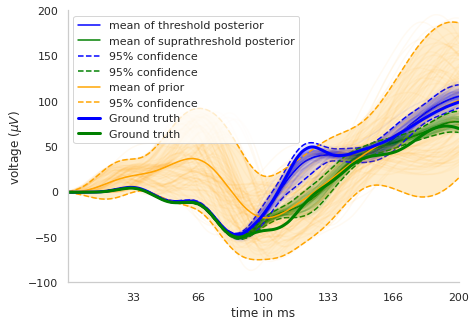

In [25]:
import seaborn as sns

sns.set() 

sns.set_style("whitegrid", {'axes.grid' : False})
#sns.set_style('ticks')

fig1, ax = plt.subplots(1, 1, figsize=(7,5))
#ax.set_title("Comparing signal")

    
plt.plot(mean_t, color ='blue', label='mean of threshold posterior')
plt.plot(mean_s, color ='green', label='mean of suprathreshold posterior')

for s in s_x_t:
    plt.plot(s, alpha=0.05, color='blue')
    #plt.ylim(-30,30)
    #plt.xlim(0, 5100)
    
for s in s_x_s:
    plt.plot(s, alpha=0.05, color='green')
    #plt.ylim(-30,30)
    #plt.xlim(0, 5100)

plt.plot(lower_t, color='blue', linestyle='dashed', label='95% confidence')
plt.plot(upper_t, color='blue', linestyle='dashed')
plt.fill_between(x= torch.arange(len(mean_prior)), y1=lower_t, y2=upper_t, color='blue', alpha=0.1)

plt.plot(lower_s, color='green', linestyle='dashed', label='95% confidence')
plt.plot(upper_s, color='green', linestyle='dashed')
plt.fill_between(x= torch.arange(len(mean_prior)), y1=lower_s, y2=upper_s, color='green', alpha=0.1)

#plt.xlim(0, 5100)
plt.ylim(-100, 200)


plt.plot(mean_prior, color ='orange', label='mean of prior')


for x_w in s_x_prior:
    plt.plot(x_w, alpha=0.05, color='orange')

plt.plot(lower_prior, color='orange', linestyle='dashed', label='95% confidence')
plt.plot(upper_prior, color='orange', linestyle='dashed')
plt.fill_between(x= torch.arange(len(mean_prior)), y1=lower_prior, y2=upper_prior, color='orange', alpha=0.2)
#plt.xlim(0, 6300)



plt.xlabel('time in ms')
#plt.ylabel('voltage ()')

fig1.gca().set_ylabel(r'voltage ($\mu V$)')
    
plt.plot(obs_real, color='blue', linewidth=3, linestyle='-', label='Ground truth')
plt.plot(obs_real2, linestyle = '-', label='Ground truth', color='green', linewidth=3)


plt.xticks([1000, 2000, 3000, 4000, 5000, 6000],[33, 66, 100, 133, 166, 200])

plt.xlim(0, 6000)

sns.despine()
plt.legend()